# Plano de Trabalho: Airline Passenger Satisfaction  (Kaggle)

## 1. Compreensão e exploração inicial
- Revisar a documentação e as colunas disponíveis.
- Calcular estatísticas básicas (média, mediana, desvio padrão, percentis).
- Visualizar distribuições das variáveis-chave (histogramas, boxplots).
- Analisar correlações entre variáveis numéricas e com a variável alvo.

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
palette = {
    'neutral or dissatisfied': '#D7263D',  # rojo fuerte
    'satisfied': '#1D4ED8'                 # azul fuerte
}
warnings.filterwarnings("ignore")

In [44]:
path = 'train.csv'
df = pd.read_csv(path).iloc[:,2:]
df.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3              3  ...                       1   
2                       2              2  ...                       5   
3                       5              5  ...                       2   
4                       3              3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 23 columns]

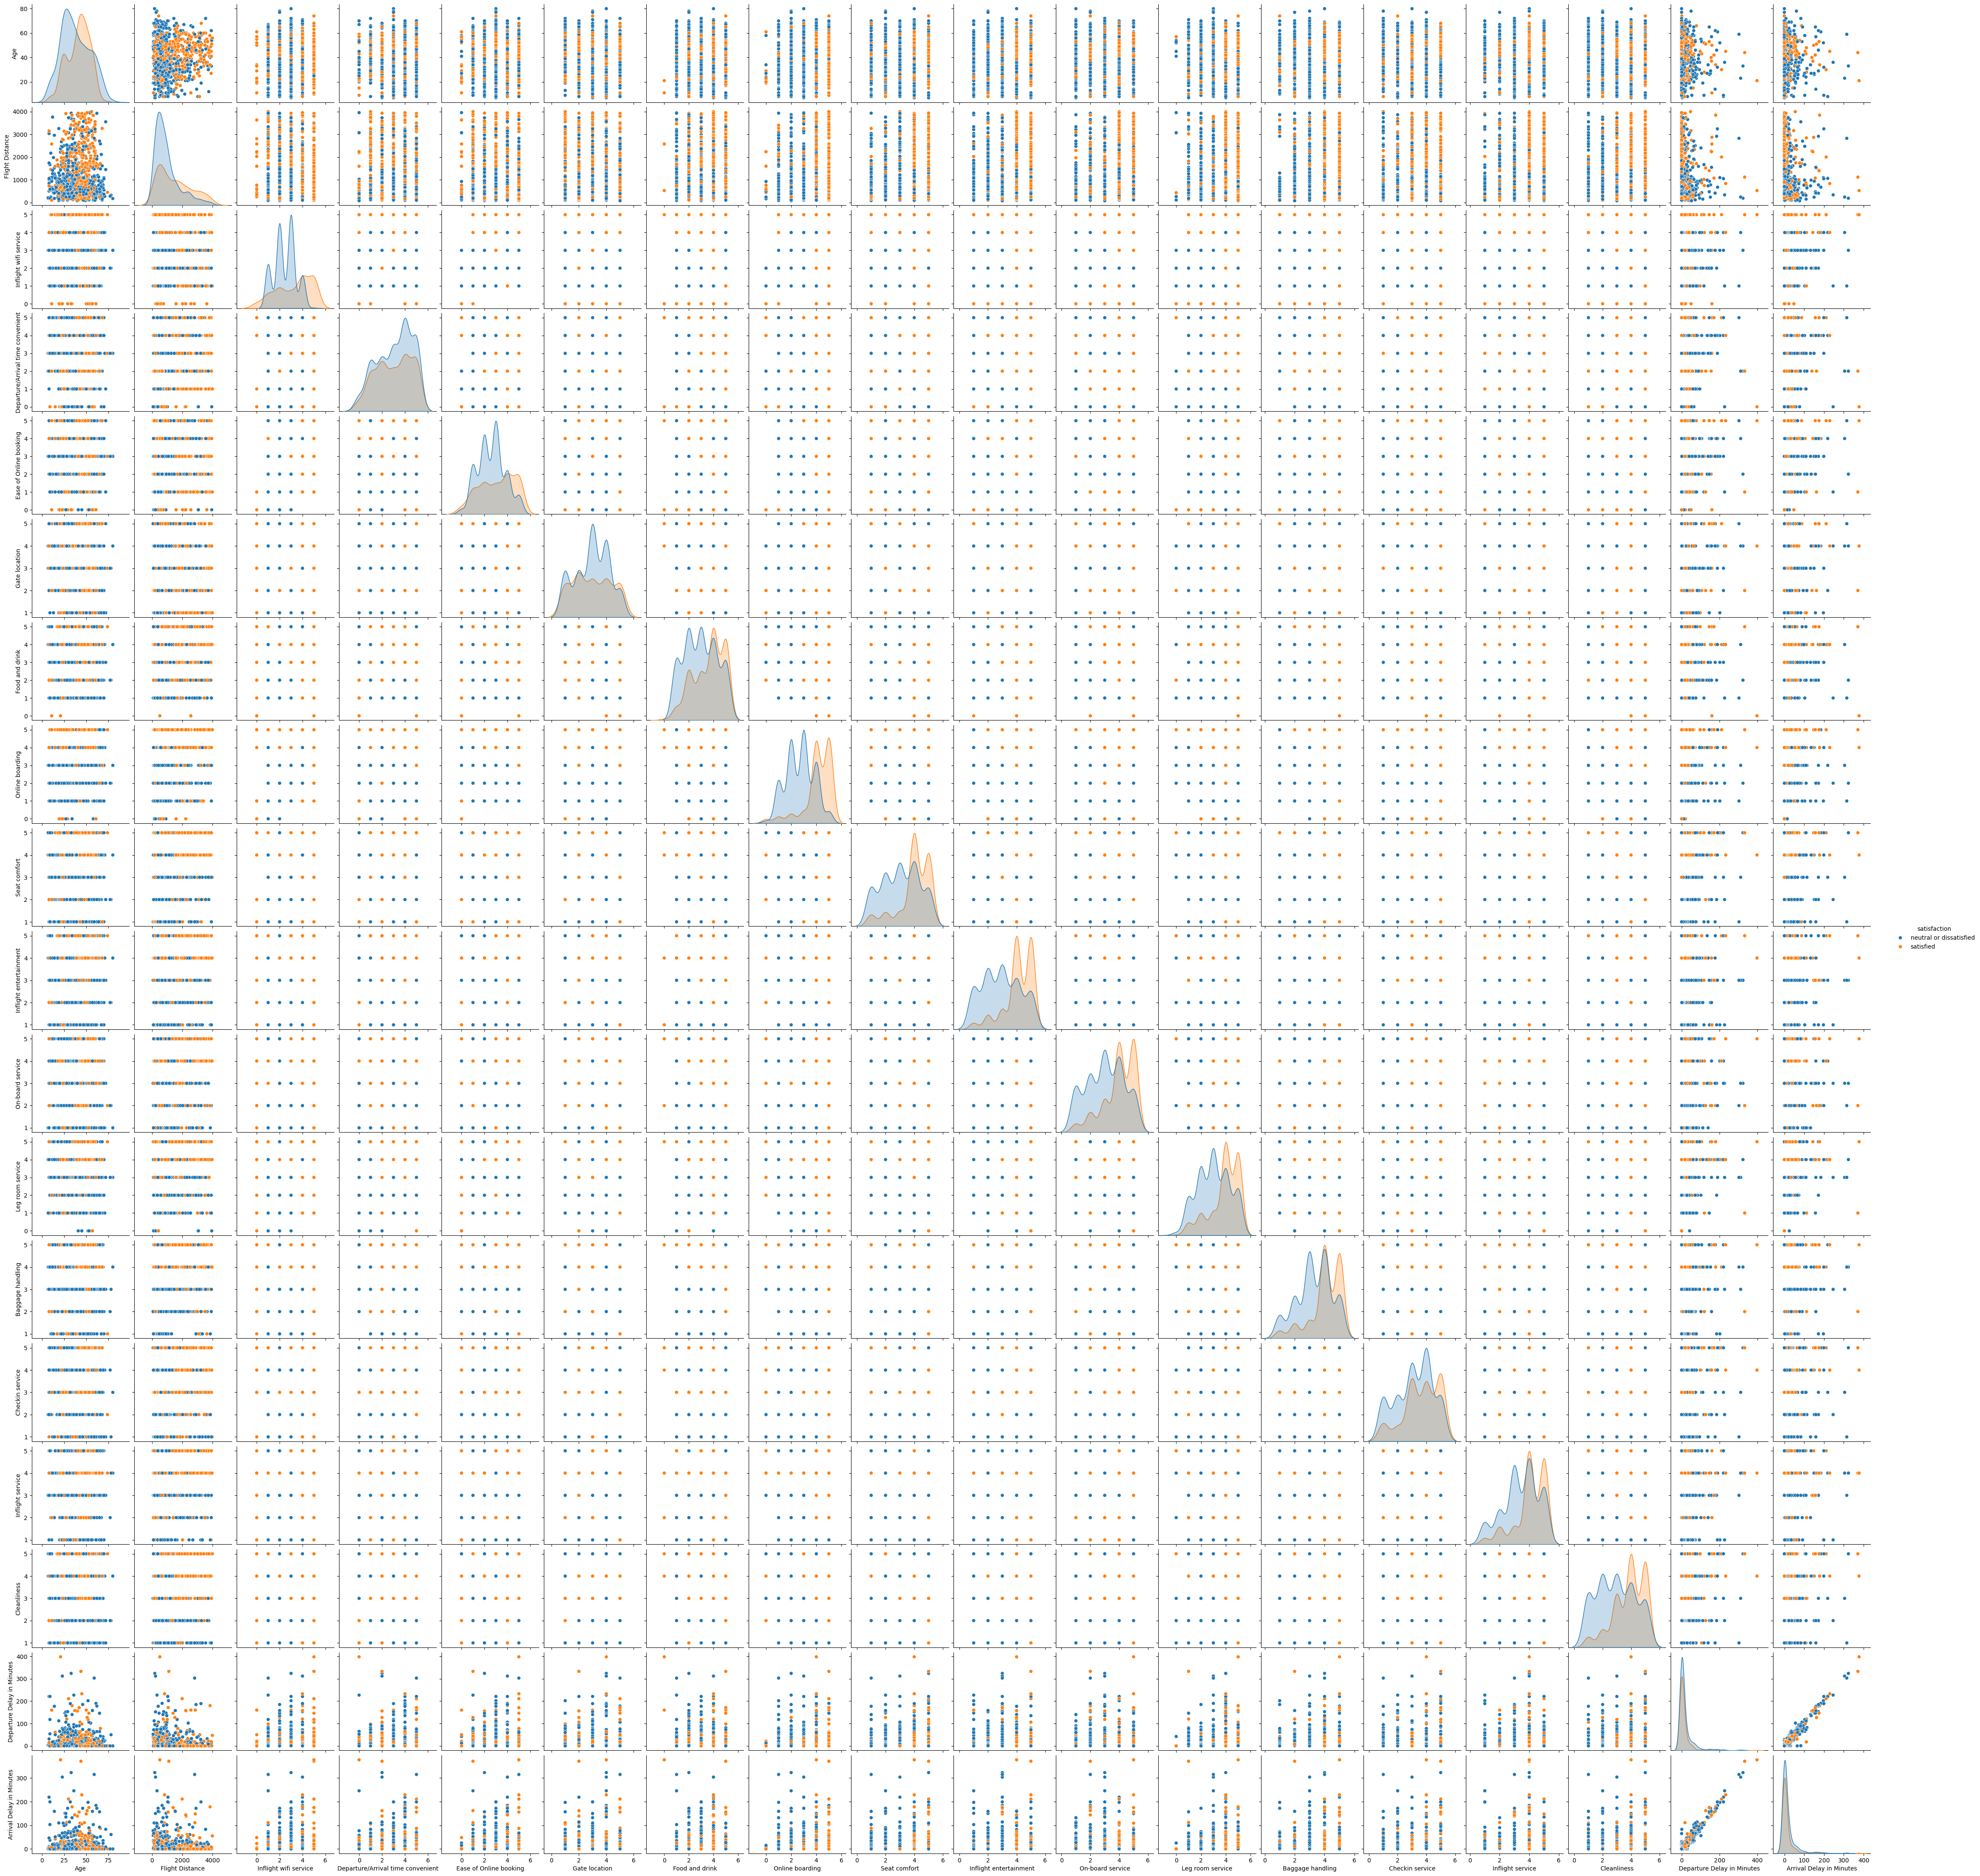

In [45]:
numerico = df.select_dtypes(include = ['float64', 'int64'])
numerico.loc[:,'satisfaction'] = df.satisfaction
numericos = numerico.sample(1000)
sns.pairplot(numericos,hue='satisfaction')

In [46]:
df.dropna(axis=0,inplace=True)
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    103594 no

- nao há dados repetidos

In [48]:
df.duplicated().sum()

0

In [49]:
categoricos = df.select_dtypes(include='object').columns
categoricos

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

## visualização de dados

In [50]:
def plot_satisfaction_distribution(df, col, target='satisfaction', palette=palette):
    dist = df.groupby([col, target]).size().reset_index(name='count')
    sns.barplot(data=dist, x=col, y='count', hue=target, palette=palette)
    plt.title("Distribuição de satisfação")
    plt.ylabel("count")
    plt.xlabel(col)
    plt.show()


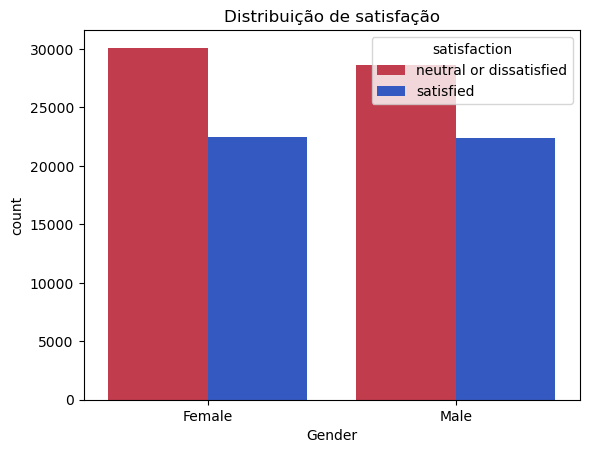

In [51]:
plot_satisfaction_distribution(df,'Gender')

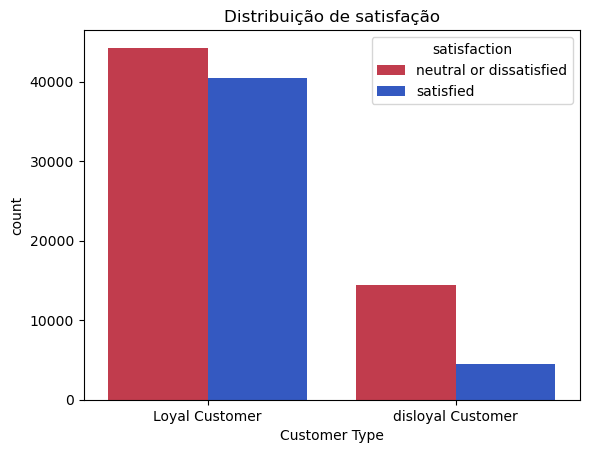

In [52]:
plot_satisfaction_distribution(df,'Customer Type')

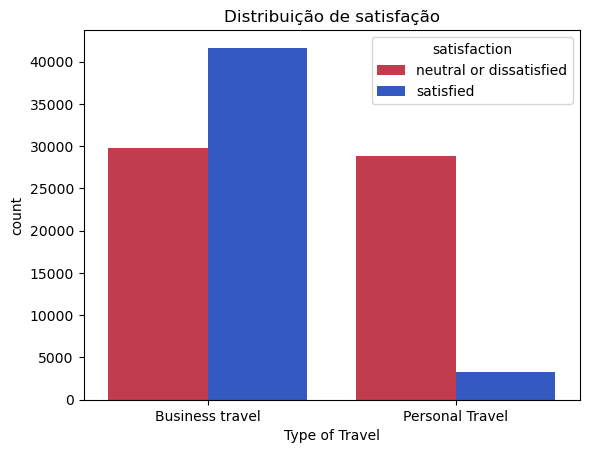

In [53]:
plot_satisfaction_distribution(df,'Type of Travel')

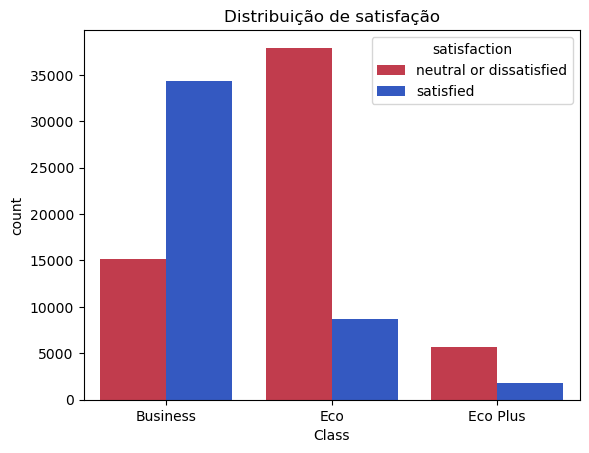

In [54]:
plot_satisfaction_distribution(df,'Class')

<Axes: xlabel='satisfaction', ylabel='count'>

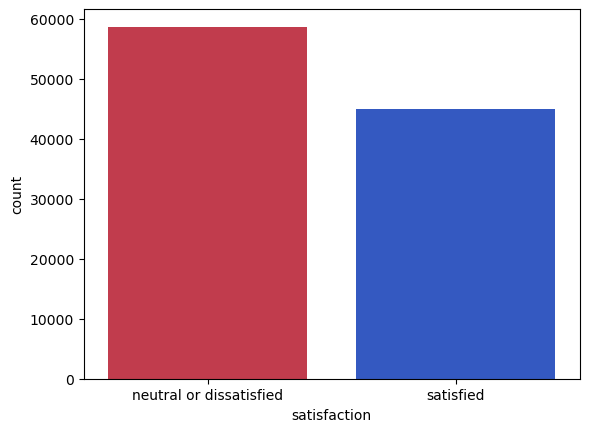

In [55]:
#df.satisfaction.value_counts().plot(kind='bar',c=palette)
sns.countplot(df,x='satisfaction',palette=palette)

| Real \ Predito                   |                          0 |                          1 |
| --------------------------------- | -------------------------: | -------------------------: |
| **0** (`satisfied`) | **TN**: real 0, predito 0 | **FP**: real 0, predito 1 |
| **1** (`neutral or dissatisfied`)               | **FN**: real 1, predito 0 | **TP**: real 1, predito 1 |


## Tratamento de dados

In [56]:
target_class= {'neutral or dissatisfied':1.0, 'satisfied':0.0}
df['satisfaction'] = df['satisfaction'].map(target_class)

In [57]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
numeric = X.select_dtypes(include=["float64"]).columns
cat_nom = X.select_dtypes(include=["object"]).columns
cat_ord = X.select_dtypes(include=["int64"]).columns
print(numeric)
print(cat_nom)
print(cat_ord)

Index(['Arrival Delay in Minutes'], dtype='object')
Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')
Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes'],
      dtype='object')


In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

preprocessor = ColumnTransformer(
    transformers=[
        ("obj", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), cat_nom),
        ("cat", "passthrough", cat_ord),
        ("num", StandardScaler(), numeric)
    ]
)

X_train = preprocessor.fit_transform(X_train)

X_test = preprocessor.transform(X_test)

In [59]:
from sklearn.feature_selection import mutual_info_classif

In [60]:
mutual_info_classif(X_train,y_train)

array([0.00397283, 0.00808627, 0.02634265, 0.0189339 , 0.12385399,
       0.11838513, 0.13850215, 0.11262402, 0.00681612, 0.04600302,
       0.06292134, 0.16269313, 0.00384083, 0.05489638, 0.01348182,
       0.02923913, 0.21357475, 0.08166323, 0.09401841, 0.05806621,
       0.06004862, 0.04473105, 0.03691149, 0.04298695, 0.054077  ,
       0.00399237, 0.00787865])

In [63]:
from sklearn.metrics import confusion_matrix

## Random Forest 

In [107]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [108]:
model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [30,50,70], 'max_depth': [3,4,5,6 ]}

stratified_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=stratified_cv,  
    scoring='precision',
    n_jobs=-1, 
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Mejores parámetros:", grid_search.best_params_)
print("\nReporte de Clasificación (en Test Set):")
print(classification_report(y_test, y_pred))

Mejores parámetros: {'max_depth': 6, 'n_estimators': 50}

Reporte de Clasificación (en Test Set):
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      8979
         1.0       0.93      0.95      0.94     11740

    accuracy                           0.93     20719
   macro avg       0.93      0.93      0.93     20719
weighted avg       0.93      0.93      0.93     20719



   - O modelo foi adequadamente ajustado?
   - Há indícios de overfitting?

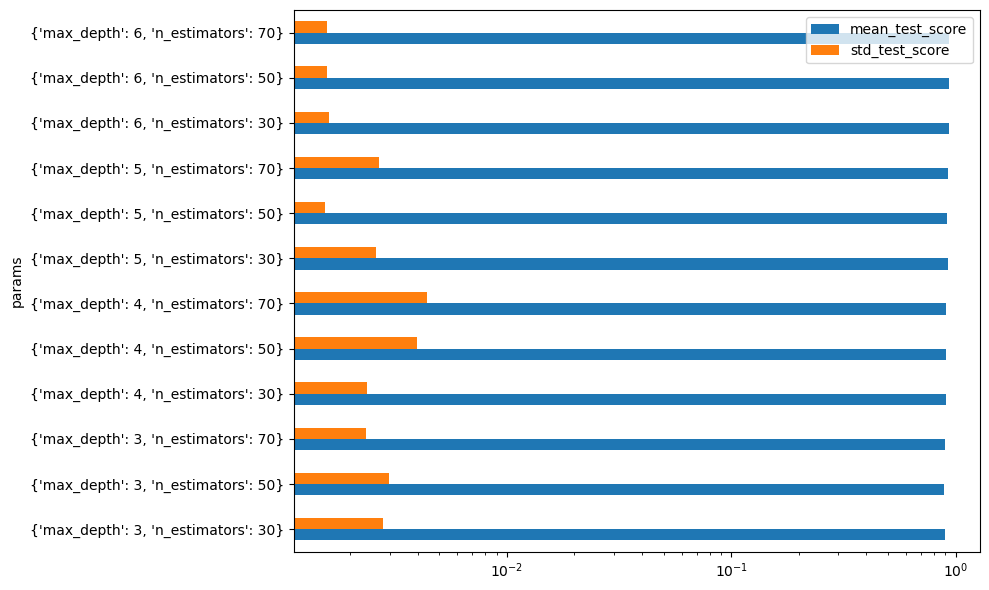

In [109]:
results = pd.DataFrame(grid_search.cv_results_)
most_relevant_columns = [
    'mean_test_score',
    'std_test_score'
]

detailed_results = results[most_relevant_columns].set_index(results.params)

ax = detailed_results.plot(kind='barh', figsize=(10, 6))
ax.set_xscale('log')
#plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

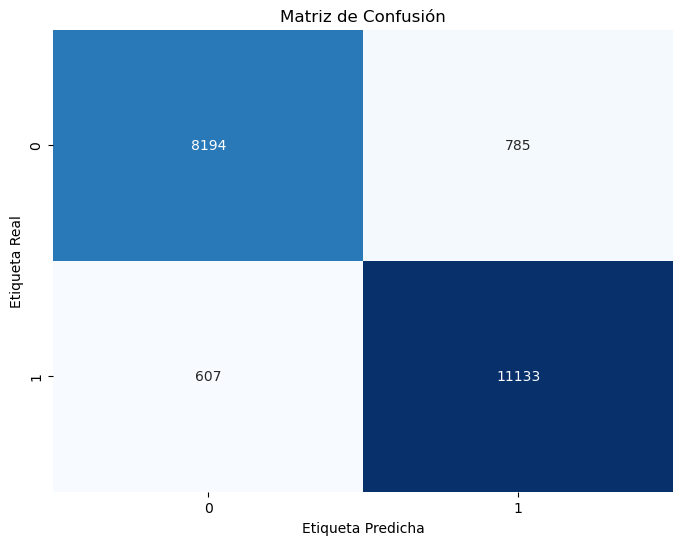

In [110]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

## Regressão Logística

In [111]:
from sklearn.linear_model import LogisticRegression

In [116]:
model = LogisticRegression(random_state=42, max_iter=1000)

param_grid = {
'C': [0.1, 1, 10],
'penalty': ['l1', 'l2'],
'solver': ['liblinear']
}

stratified_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

grid_search = GridSearchCV(
estimator=model,
param_grid=param_grid,
cv=stratified_cv,
scoring='precision',
n_jobs=-1,
verbose=1
)

grid_search.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid_search.best_params_}")
print(f"Mejor recall (promedio CV): {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Fitting 4 folds for each of 6 candidates, totalling 24 fits
Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor recall (promedio CV): 0.8778

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85      8979
         1.0       0.88      0.90      0.89     11740

    accuracy                           0.88     20719
   macro avg       0.87      0.87      0.87     20719
weighted avg       0.88      0.88      0.88     20719



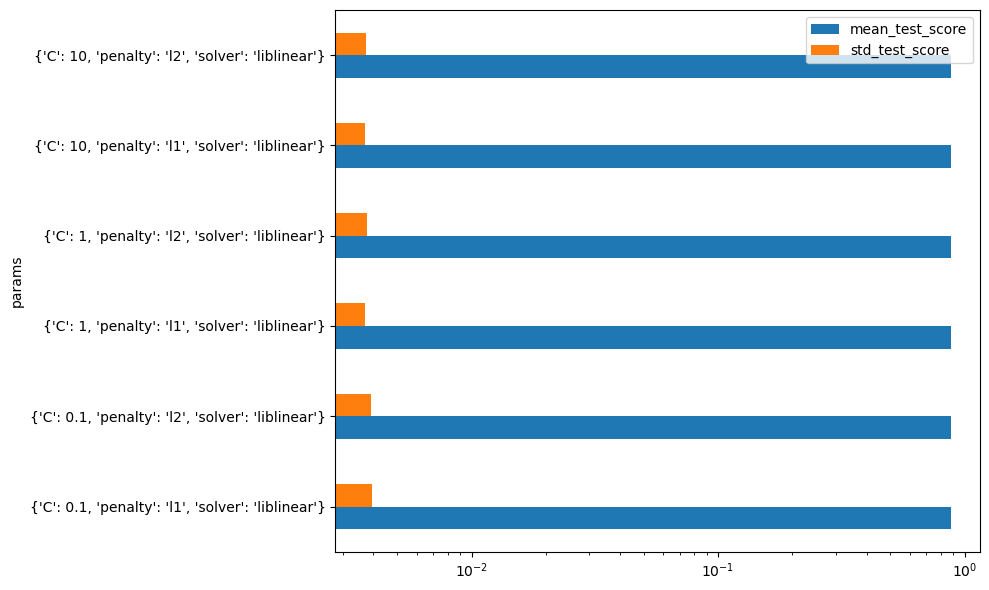

In [118]:
results = pd.DataFrame(grid_search.cv_results_)
most_relevant_columns = [
    'mean_test_score',
    'std_test_score'
]
detailed_results = results[most_relevant_columns].set_index(results.params)
ax = detailed_results.plot(kind='barh', figsize=(10, 6))
ax.set_xscale('log')
#plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

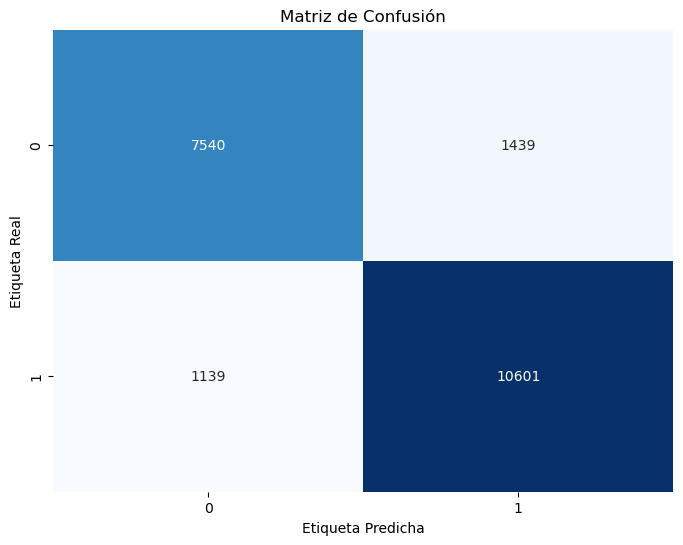

In [119]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

- Avaliação de pelo menos dois modelos diferentes;
- Exploração de hiper-parâmetros se aplicável;
- Utilização de validação cruzada para avaliação de desempenho;
- Justificativa da escolha das métricas de avaliação utilizadas (ex:
acurácia, F1-score, erro quadrático médio, etc.);
- Análise crítica dos resultados obtidos, contemplando, por exemplo, os
seguintes aspectos (os termos ficarão claros durante a disciplina, estão
aqui apenas para ilustrar o que é esperado):
   - O modelo foi adequadamente ajustado?
   - Há indícios de overfitting?
   - Os erros estão distribuídos de forma uniforme entre as
classes/dados? Existem padrões?
   - O que as métricas de avaliação revelam sobre o desempenho?
   - A validação cruzada apresenta comportamento consistente? Existem
partições que se destacam por maior erro?
